# **Libraries and Dataset**

In [1]:
!pip install datasets

In [2]:
import re
import datasets
from datasets import load_dataset_builder, load_dataset

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
simbolo = dataset = load_dataset("Simbolo-Servicio/wiki-burmese-sentences")
sim_train = simbolo['train']['text']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# **Sayar Ye Kyaw Thu's Sylbreak**

In [4]:
def create_break_pattern():
    """Creates and returns the regular expression pattern for Myanmar syllable breaking."""
    my_consonant = r"က-အ"
    en_char = r"a-zA-Z0-9"
    other_char = r"ဣဤဥဦဧဩဪဿ၌၍၏၀-၉၊။!-/:-@[-`{-~\s"
    subscript_symbol = r'္'
    a_that = r'်'

    # Regular expression pattern for Myanmar syllable breaking
    return re.compile(
        r"((?<!" + subscript_symbol + r")[" + my_consonant + r"]"
        r"(?!["
        + a_that + subscript_symbol + r"])"
        + r"|[" + en_char + other_char + r"])"
    )

def break_syllables(line, break_pattern, separator):
    """Applies syllable breaking rules to a line."""
    line = re.sub(r'\s+', ' ', line.strip())
    segmented_line = break_pattern.sub(separator + r"\1", line)

    # Remove the leading delimiter if it exists
    if segmented_line.startswith(separator):
        segmented_line = segmented_line[len(separator):]

    # Replace delimiter+space+delimiter with a single space
    double_delimiter = separator + " " + separator
    segmented_line = segmented_line.replace(double_delimiter, " ")

    return segmented_line

In [5]:
EOS = []

break_pattern = create_break_pattern()

for sentence in sim_train:
  EOS.append(break_syllables(sentence, break_pattern, " ").split()[-1])

EOS_unique = list(set(EOS))

EOS_frequencies = {i: EOS.count(i) for i in EOS_unique}
EOS_frequencies

{'သို့': 12,
 'ပွဲ': 18,
 'ကာ': 23,
 'လေ': 51,
 'ရိတ္တ': 2,
 'သုံ': 2,
 'ဇား': 2,
 'ဝါး': 1,
 'နည်း': 75,
 'ရောင်': 2,
 'မှာ': 7,
 'တင်': 15,
 'နေ': 4,
 'ကြိတ်': 1,
 'ဖူ': 1,
 'လှူ': 2,
 'လင်’': 1,
 'လျော့': 1,
 'တယ်”': 1,
 'ဖျင်း': 1,
 'လူ': 3,
 'ထက်': 1,
 'ရာ…': 1,
 'ကင်း': 3,
 'm': 5,
 'ခင်း': 9,
 'ရုတ်': 1,
 'တွင်း': 2,
 'ပန်း': 2,
 'မြှိုက်': 1,
 'တဲ': 1,
 'အတ္ထုပ္ပတ္တိ': 1,
 'ဖယ်': 1,
 'ထွတ်': 2,
 'ဟုတ်”': 1,
 'ကြည်': 5,
 'စီ': 1,
 'ဗ': 1,
 'ဆေး': 4,
 'ဒံ': 2,
 'စွမ်း': 1,
 'ဒွန်': 2,
 '၏”': 8,
 'ကောင်း': 18,
 'ဆူ': 3,
 'ကြွယ်': 1,
 'ပိန်း': 1,
 'မုတ်': 1,
 'နွေး': 5,
 'နန္ဒာ': 25,
 'မျက်': 1,
 'ပုသ်': 4,
 'စ': 3,
 'ထာ': 5,
 'ဝယ်': 4,
 'ကိုင်': 3,
 'ဒါတ်': 2,
 'အမ်': 1,
 'ကီ': 1,
 'န': 18,
 'ကွဲ': 9,
 'ပတ္တိ': 4,
 'တဗ္ဗံ': 2,
 '0': 3,
 'မှူး': 15,
 'ဒိုင်': 2,
 'ကွေ့': 1,
 'မိုက်': 3,
 'သဏ္ဌာန်': 1,
 'ဝံ': 2,
 'ရမ်း': 1,
 'လီ': 4,
 'ကြေ': 1,
 'မှိုင်': 2,
 'နွှဲ': 1,
 'ပုတ္တ': 1,
 'လာ': 23,
 'တီ': 6,
 'မွေး': 3,
 'မြည်': 1,
 'လိမ်': 3,
 'လိ': 1,
 'လုပ်': 6,
 'လေး': 30,
 'ဘန္တေ': 

# **KO Swan Htet Aung's ReSegment**

In [6]:
def segment(text):
    text = re.sub(r'(?:(?<!္)([က-ဪဿ၊-၏]|[၀-၉]+|[^က-၏]+)(?![ှျ]?[့္်]))', r'𝕊\1', text).strip('𝕊').split('𝕊')
    return text

In [7]:
EOS_2 = []

for sentence in sim_train:
  EOS_2.append(segment(sentence)[-1])

EOS_unique1 = list(set(EOS_2))

EOS_frequencies1 = {i: EOS_2.count(i) for i in EOS_unique1}
# EOS_frequencies1

In [8]:
EOS_frequencies_over_100 = {word: freq for word, freq in EOS_frequencies1.items() if freq > 100}

In [9]:
EOS_frequencies_over_100

{'ဉာဏ်': 126,
 'ဘူး': 111,
 'ခြင်း': 430,
 'ရှိ': 112,
 'ချောင်း': 106,
 '၂': 111,
 'ရက်': 210,
 'ပြီ': 252,
 'ခဲ့': 141,
 'မည်': 1015,
 'ကြီး': 115,
 'ပေ': 1170,
 'တည်း': 412,
 'သည်': 81575,
 'ရ': 114,
 'တယ်': 1481,
 '၏': 9110,
 ')': 506,
 'ပါ': 723,
 'သုတ်': 415,
 'ချေ': 1000}

In [10]:
words = list(EOS_frequencies_over_100.keys())
frequencies = list(EOS_frequencies_over_100.values())

In [11]:
fontPath = '/content/mmrtext.ttf'
prop = fm.FontProperties(fname=fontPath, size=12)

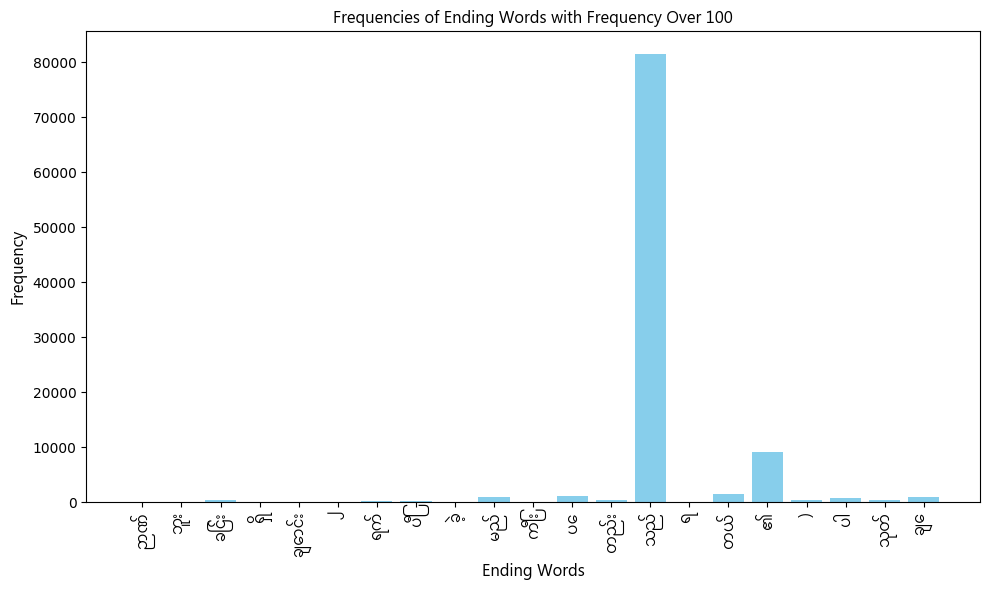

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Ending Words', fontproperties=prop)
plt.ylabel('Frequency', fontproperties=prop)
plt.title('Frequencies of Ending Words with Frequency Over 100', fontproperties=prop)
plt.xticks(rotation=90, fontproperties=prop)
plt.tight_layout()
plt.show()

plt.savefig('Frequencies of Ending Words with Frequency Over 100.png')